In [1]:
import os
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'orly.settings.dev')

import django
django.setup()

In [9]:
from django.conf import settings
from django.http import HttpResponse
from django.shortcuts import redirect, render
from PIL import Image, ImageFont, ImageDraw
from cover.utils import COLOR_CODES

from IPython.display import Image as DisplayImage

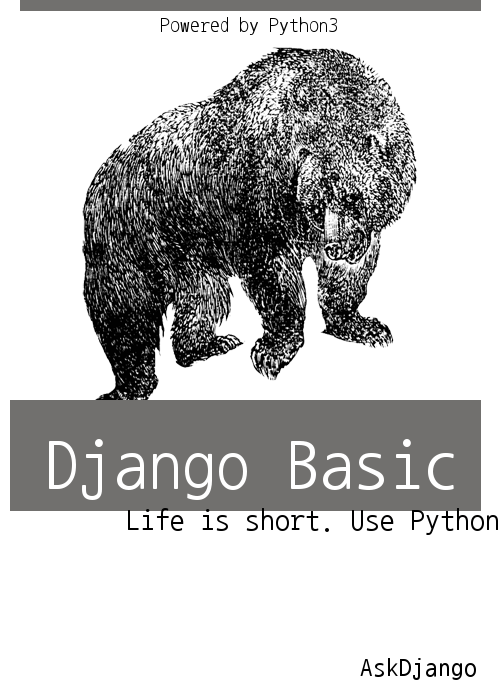

In [108]:
def image_generator(data):
    title = data['title']
    top_text = data['top_text']
    author = data['author']
    animal_code = data['animal_code']
    color_index = data['color_code']
    guide_text = data['guide_text']
    guide_text_placement = data['guide_text_placement']

    animal_path = settings.ROOT('assets', 'animal', '{}.png'.format(animal_code))
    animal_im = Image.open(animal_path)
    animal_im = animal_im.resize((400, 400))

    color = COLOR_CODES[int(color_index)]

    canvas_im = Image.new('RGB', (500, 700), (255, 255, 255, 255))

    # GUIDE 이미지
#     sample_im = Image.open('rly-sample.png')
#     canvas_im.paste(sample_im, (0, 0))

    canvas_im.paste(animal_im, (50, 40))  # left/top 지정
    
    ttf_path = settings.ROOT('assets', 'fonts', 'NanumGothicCoding.ttf')
    draw = ImageDraw.Draw(canvas_im)

    draw.rectangle((20, 0, 480, 10), fill=color)
    
    draw.rectangle((10, 400, 480, 510), fill=color)
    
    fnt = ImageFont.truetype(ttf_path, 70)
    draw.text((45, 430), title, font=fnt, fill=(255, 255, 255, 255))

    fnt = ImageFont.truetype(ttf_path, 20)
    draw.text((160, 15), top_text, font=fnt, fill=(0, 0, 0, 255))

    fnt = ImageFont.truetype(ttf_path, 25)
    draw.text((360, 655), author, font=fnt, fill=(0, 0, 0, 255))
    
    fnt = ImageFont.truetype(ttf_path, 30)
    position = (125, 505)  # bottom-right
    draw.text(position, guide_text, font=fnt, fill=(0, 0, 0, 255))

    response = HttpResponse(content_type='image/png')  # file-like
    canvas_im.save(response, format='PNG')
    return response

r = image_generator({
    'title': 'Django Basic',
    'top_text': 'Powered by Python3',
    'author': 'AskDjango',
    'animal_code': '1',
    'color_code': '1',
    'guide_text': 'Life is short. Use Python/Django.',
    'guide_text_placement': 'bottom_right',
})
DisplayImage(r.getvalue())